### Car price prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


Now in order to **car price** we need to know how old the car is, but this feature is not present dataset. So, we will create one column of our own that is 'Current year', from which we will calculate how old the car is

In [8]:
df['Current_year']=2020
df['Number_of_years(Age of car)'] = df['Current_year']-df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Number_of_years(Age of car)
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


Now in our final dataset we don't need many columns like 'Car_name', 'Year' etc, we are dropping them.

In [9]:
final_dataset = df.drop(['Car_Name','Year','Current_year'],axis=1)

In [10]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years(Age of car)
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


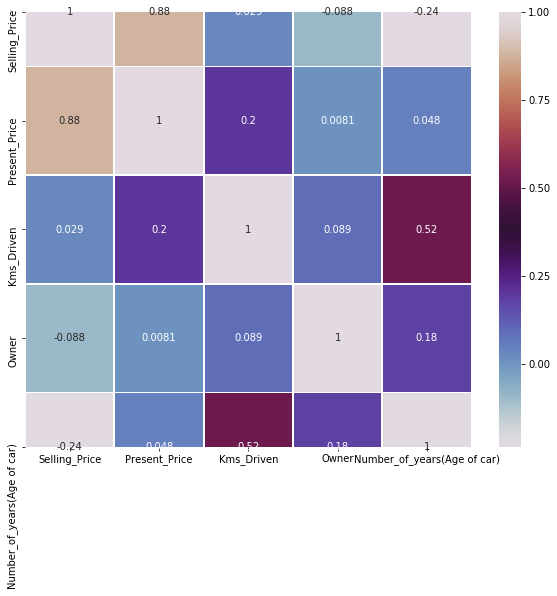

In [11]:
# Next we should find for any correlation among the columns
corr = final_dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,linewidths=0.8,cmap='twilight')


From the co-relation plot or heatmap it's clear none of the columns have multi-colinearity among themeselves.

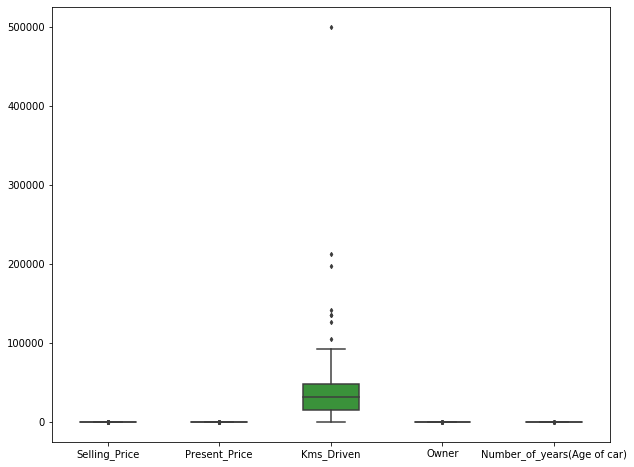

In [12]:
#Boxplot
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=final_dataset, width= 0.5,ax=ax,  fliersize=3)

So, from the above picture it is clear 'Kms_Driven' have outliers.

In [13]:
q1,q3 = np.percentile(final_dataset['Kms_Driven'],(25,75))
IQR_kms_driven = q3 - q1

In [14]:
print(IQR_kms_driven)

33767.0


In [15]:
lower_bound_value = q1 - (1.5*IQR_kms_driven)
higher_bound_value = q3 + (1.5*IQR_kms_driven)

print(lower_bound_value,higher_bound_value)

-35650.5 99417.5


In [16]:
final_dataset[final_dataset['Kms_Driven'] >= 100000]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years(Age of car)
37,0.35,2.28,127000,Petrol,Individual,Manual,0,17
50,14.90,30.61,104707,Diesel,Dealer,Automatic,0,8
53,16.00,30.61,135000,Diesel,Individual,Automatic,0,7
77,1.50,12.35,135154,Petrol,Dealer,Automatic,0,16
84,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
85,2.50,23.73,142000,Petrol,Individual,Automatic,3,14
179,0.31,1.05,213000,Petrol,Individual,Manual,0,10
196,0.17,0.52,500000,Petrol,Individual,Automatic,0,12


In [17]:
final_dataset.drop(final_dataset[final_dataset['Kms_Driven'] >= 100000].index,axis=0,inplace=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years(Age of car)
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [19]:
final_dataset.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years(Age of car)
count,293.000000,293.000000,293.000000,293.000000,293.000000
mean,4.654710,7.445597,32652.122867,0.034130,6.208191
std,5.048855,8.462679,21435.638086,0.181873,2.690865
min,0.100000,0.320000,500.000000,0.000000,2.000000
25%,0.900000,1.200000,15000.000000,0.000000,4.000000
50%,3.750000,6.100000,31427.000000,0.000000,5.000000
75%,6.000000,9.540000,45780.000000,0.000000,8.000000
max,35.000000,92.600000,92233.000000,1.000000,17.000000


In [20]:
final_dataset.shape

(293, 8)

Now we will encode 'Seller_Type', 'Transmission' columns manually.

In [21]:
final_dataset['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [22]:
final_dataset['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [23]:
final_dataset['Seller_Type'] = final_dataset['Seller_Type'].map({'Dealer': 0, 'Individual': 1})

In [24]:
final_dataset['Transmission'] = final_dataset['Transmission'].map({'Manual': 0, 'Automatic': 1})

In [25]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years(Age of car)
0,3.35,5.59,27000,Petrol,0,0,0,6
1,4.75,9.54,43000,Diesel,0,0,0,7
2,7.25,9.85,6900,Petrol,0,0,0,3
3,2.85,4.15,5200,Petrol,0,0,0,9
4,4.60,6.87,42450,Diesel,0,0,0,6


'Fuel type' column will be encoded using 'One-hot encoding'.

In [26]:
#creating dummy variable for 'Fuel_type'

fuel_type_dummy = pd.get_dummies(final_dataset['Fuel_Type'],prefix='Fuel_Type',drop_first=True)
fuel_type_dummy.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [27]:
fuel_type_dummy.shape

(293, 2)

In [28]:
final_dataset = pd.concat([final_dataset,fuel_type_dummy],axis=1)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years(Age of car),Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,Petrol,0,0,0,6,0,1
1,4.75,9.54,43000,Diesel,0,0,0,7,1,0
2,7.25,9.85,6900,Petrol,0,0,0,3,0,1
3,2.85,4.15,5200,Petrol,0,0,0,9,0,1
4,4.60,6.87,42450,Diesel,0,0,0,6,1,0


In [29]:
#Dropping the 'Fuel_type' categorical column from the dataset
final_dataset.drop('Fuel_Type',axis=1,inplace=True)
#Checking the dataset
final_dataset.sample(5)

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Number_of_years(Age of car),Fuel_Type_Diesel,Fuel_Type_Petrol
133,0.72,0.95,500,1,0,0,4,0,1
34,5.50,8.06,45000,0,0,0,6,1,0
287,5.75,7.50,44000,0,1,0,5,0,1
151,0.50,0.55,31000,1,0,0,4,0,1
236,3.10,4.43,11849,0,0,0,4,0,1


In [30]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 300
Data columns (total 9 columns):
Selling_Price                  293 non-null float64
Present_Price                  293 non-null float64
Kms_Driven                     293 non-null int64
Seller_Type                    293 non-null int64
Transmission                   293 non-null int64
Owner                          293 non-null int64
Number_of_years(Age of car)    293 non-null int64
Fuel_Type_Diesel               293 non-null uint8
Fuel_Type_Petrol               293 non-null uint8
dtypes: float64(2), int64(5), uint8(2)
memory usage: 18.9 KB


In [31]:
final_dataset.describe()

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Number_of_years(Age of car),Fuel_Type_Diesel,Fuel_Type_Petrol
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,4.654710,7.445597,32652.122867,0.344710,0.119454,0.034130,6.208191,0.194539,0.798635
std,5.048855,8.462679,21435.638086,0.476087,0.324877,0.181873,2.690865,0.396523,0.401706
min,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
50%,3.750000,6.100000,31427.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000
75%,6.000000,9.540000,45780.000000,1.000000,0.000000,0.000000,8.000000,0.000000,1.000000
max,35.000000,92.600000,92233.000000,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000


Dividing feature column and label column

In [32]:
X = final_dataset.drop('Selling_Price',axis=1)
y = final_dataset['Selling_Price']

In [33]:
X.shape

(293, 8)

In [34]:
#train_test_split

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [37]:
X_train.head()

,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Number_of_years(Age of car),Fuel_Type_Diesel,Fuel_Type_Petrol
217,4.430,15000,0,0,0,4,0,1
38,3.760,10079,0,0,0,4,0,1
16,10.790,41678,0,0,0,5,1,0
298,11.000,87934,0,0,0,11,0,1
146,0.787,15000,1,0,0,6,0,1


In [38]:
X_train.shape

(219, 8)

In [39]:
y_train.head()

217    3.15
38     3.00
16     7.25
298    3.35
146    0.55
Name: Selling_Price, dtype: float64

#### Model Building (without scaling)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [41]:
from sklearn.metrics import mean_squared_error

##### Random forest model

In [42]:
rf_model = RandomForestRegressor(random_state=333)

In [43]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=333)

In [44]:
rf_model.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [45]:
rf_model.score(X_train,y_train)

0.9892999276893454

In [46]:
rf_model.score(X_test,y_test)

0.8575463465854755

In [47]:
y_pred = rf_model.predict(X_test)

Checking the RMSE value.

In [48]:
from math import sqrt
print("RMSE is below")
print("----"*10)
print(sqrt(mean_squared_error(y_test,y_pred)))
print(mean_squared_error(y_test,y_pred,squared = False)) #learned a new thing 

RMSE is below
----------------------------------------
2.038768193615277
2.038768193615277


###### Applying Hyperparameter tuning

##### Random search CV

In [49]:
random_param = {
     "n_estimators" : [100,300,500,700],
    "max_depth" : [5,10,15,20],
    "min_samples_leaf" : [1, 2, 5],
    'max_features' : ['auto', 'sqrt']
}

In [50]:
random_search = RandomizedSearchCV(estimator=rf_model,param_distributions=random_param,n_iter=75,cv=3,verbose=6,n_jobs=-1)

In [51]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   46.4s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=333),
                   n_iter=75, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'n_estimators': [100, 300, 500, 700]},
                   verbose=6)

In [52]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [53]:
random_search.best_score_

0.9182970657063985

In [54]:
random_search.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=333)

Creating new model with hypertuned parameters obtained from randomized search CV

In [55]:
rf_model = RandomForestRegressor(n_estimators=300,min_samples_leaf=1,max_features='auto',max_depth=10,random_state=333)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=333)

In [56]:
rf_model.score(X_train,y_train)

0.9885552122886834

In [57]:
rf_model.score(X_test,y_test)

0.8555088758854958

In [58]:
y_pred = rf_model.predict(X_test)
print("RMSE is below")
print("----"*10)
print(sqrt(mean_squared_error(y_test,y_pred)))
print(mean_squared_error(y_test,y_pred,squared = False)) #learned a new thing

RMSE is below
----------------------------------------
2.0532963666107626
2.0532963666107626


In [59]:
random_search

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=333),
                   n_iter=75, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'n_estimators': [100, 300, 500, 700]},
                   verbose=6)

###### Grid Search CV

In [60]:
grid_param = {
    "n_estimators" : [random_search.best_params_['n_estimators']-100,
                     random_search.best_params_['n_estimators'],
                     random_search.best_params_['n_estimators']+100],
    "max_depth" : [random_search.best_params_['max_depth']],
    "min_samples_leaf" : [random_search.best_params_['min_samples_leaf'],
                         random_search.best_params_['min_samples_leaf']+2,
                         random_search.best_params_['min_samples_leaf']+4],
    'max_features' : ['auto', 'sqrt','log2']
}
print(grid_param)

{'n_estimators': [200, 300, 400], 'max_depth': [10], 'min_samples_leaf': [1, 3, 5], 'max_features': ['auto', 'sqrt', 'log2']}


In [61]:
grid_search = GridSearchCV(estimator=rf_model,param_grid=grid_param,cv=7,verbose=5,n_jobs=-1)

In [62]:
grid_search.fit(X_train,y_train)

Fitting 7 folds for each of 27 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:   27.8s finished


GridSearchCV(cv=7,
             estimator=RandomForestRegressor(max_depth=10, n_estimators=300,
                                             random_state=333),
             n_jobs=-1,
             param_grid={'max_depth': [10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [200, 300, 400]},
             verbose=5)

In [63]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 400}

In [64]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=400, random_state=333)

Creating new model with hypertuned parameters obtained from **Grid-search CV**.

In [65]:
rf_model_grid = RandomForestRegressor(max_depth=10, n_estimators=400, random_state=333)
rf_model_grid.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=400, random_state=333)

In [66]:
rf_model_grid.score(X_train,y_train)

0.9891271013849302

In [67]:
rf_model_grid.score(X_test,y_test)

0.8604836395847221

In [68]:
y_pred = rf_model_grid.predict(X_test)
print("RMSE is below")
print("----"*10)
#print(sqrt(mean_squared_error(y_test,y_pred)))
print(mean_squared_error(y_test,y_pred,squared = False)) #learned a new thing

RMSE is below
----------------------------------------
2.017639737951506


###### XGBoost

In [69]:
boosting_model = XGBRegressor()

In [70]:
boosting_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
boosting_model.score(X_test,y_test)

0.7512263470877005

Since the **performance of Xgboost is so poor** we are not going to use this.

#### Model Building (with scaling)

In [72]:
scaler = StandardScaler()

In [73]:
# Scaling Feature columns
X_scaled = scaler.fit_transform(X)

In [97]:
#standard scaler pickle 
file = 'standardScaler.pickle'
#dumping into the pickle file
pickle.dump(scaler,open(file,'wb'))

In [74]:
#train_test_split
train_x,test_x,train_y,test_y = train_test_split(X_scaled,y,test_size=0.25, random_state=42)

##### Random forest

In [75]:
rf_model_scaled = RandomForestRegressor(random_state=333)
rf_model_scaled.fit(train_x,train_y)

RandomForestRegressor(random_state=333)

In [76]:
rf_model_scaled.score(test_x,test_y)

0.8608510823570757

Checking the RMSE value of normal RF model.

In [77]:
y_pred_scaled = rf_model_scaled.predict(test_x)
print("RMSE is below")
print("----"*10)
#print(sqrt(mean_squared_error(y_test,y_pred)))
print(mean_squared_error(y_test,y_pred_scaled,squared = False))

RMSE is below
----------------------------------------
2.0149810679816134


##### Applying Hyperparameter tuning
#### Random search CV 

In [78]:
random_param = {
     "n_estimators" : [200,300,400,500,600,700],
    "max_depth" : [5,10,15,20,25],
    "min_samples_leaf" : [1, 2, 5],
    'max_features' : ['auto', 'sqrt']
}

In [79]:
random_search = RandomizedSearchCV(estimator=rf_model_scaled,param_distributions=random_param,n_iter=80,cv=3,verbose=6,n_jobs=-1)

In [80]:
random_search.fit(train_x,train_y)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   40.4s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=333),
                   n_iter=80, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700]},
                   verbose=6)

In [81]:
#finding the best params
random_search.best_params_

{'n_estimators': 500,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [82]:
random_search.best_score_

0.9180328529770797

In [83]:
random_search.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=333)

##### Gridsearch CV

In [84]:
# parameters for Grid Search with scaled data
grid_param_scaled = {
    "n_estimators" : [random_search.best_params_['n_estimators']-100,
                      random_search.best_params_['n_estimators']-50,
                      random_search.best_params_['n_estimators']-25,
                      random_search.best_params_['n_estimators'],
                      random_search.best_params_['n_estimators']+25,
                      random_search.best_params_['n_estimators']+50,
                      random_search.best_params_['n_estimators']+100],
    "max_depth" : [random_search.best_params_['max_depth']],
    "min_samples_leaf" : [random_search.best_params_['min_samples_leaf'],
                         random_search.best_params_['min_samples_leaf']+2,
                         random_search.best_params_['min_samples_leaf']+4],
    'max_features' : [random_search.best_params_['max_features'],'sqrt']
}
print(grid_param_scaled)

{'n_estimators': [400, 450, 475, 500, 525, 550, 600], 'max_depth': [10], 'min_samples_leaf': [1, 3, 5], 'max_features': ['auto', 'sqrt']}


In [85]:
#Grid_search
grid_search = GridSearchCV(estimator=rf_model_scaled,param_grid=grid_param_scaled,cv=5,verbose=7,n_jobs=-1)

In [86]:
grid_search.fit(test_x,test_y)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   39.0s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=333), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [400, 450, 475, 500, 525, 550, 600]},
             verbose=7)

In [87]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 475}

In [88]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=475, random_state=333)

Creating new model with hypertuned parameters obtained from **Grid-search CV**.

In [89]:
rf_model_grid = RandomForestRegressor(max_depth=10, n_estimators=550, random_state=333)
rf_model_grid.fit(train_x,train_y)

RandomForestRegressor(max_depth=10, n_estimators=550, random_state=333)

In [90]:
rf_model_grid.score(test_x,test_y)

0.8627085732547081

RMSE value of model.

In [91]:
y_pred_scaled = rf_model_grid.predict(test_x)
print("RMSE is below")
print("----"*10)
#print(sqrt(mean_squared_error(y_test,y_pred)))
print(mean_squared_error(y_test,y_pred_scaled,squared = False))

RMSE is below
----------------------------------------
2.0014869504481054


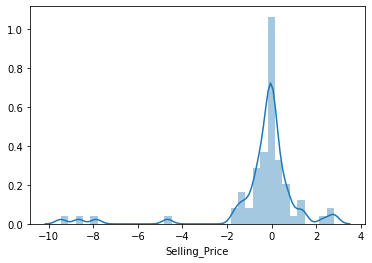

In [92]:
sns.distplot(test_y-y_pred_scaled)

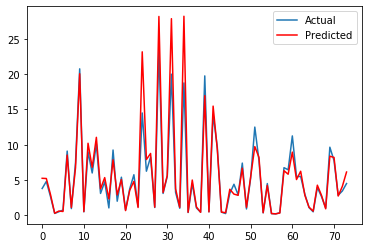

In [93]:
plt.plot(test_y.values)
plt.plot(y_pred_scaled,color = 'red')
plt.legend(['Actual','Predicted'])
plt.show()

#### Creating pickle file of Random forest model(with scaled data)

In [96]:
import pickle

In [95]:
#name of the file
#filename = 'random_forest.pickle'
#dumping the model
#pickle.dump(rf_model_grid,open(filename,'wb'))
#loading the created model from pickle file

#loaded_model_rf = pickle.load(open(filename,'rb'))